In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Use of the ordinary least squares method 
def computeParam(X,Y):
    
    beta = np.sum((X-np.mean(X))*(Y-np.mean(Y))) / np.sum((X-np.mean(X))**2)
    alpha = np.mean(Y) - beta*np.mean(X)
    
    result = [alpha,beta]
    
    return result

In [3]:
#Use of the library spicy
from scipy import stats

def computeParamScipy(df):
    X = df.x
    Y = df.y

    resultTemp = stats.linregress(X, Y)
    result = [resultTemp.intercept, resultTemp.slope]
    
    return result

In [4]:
#Use of the library scikit-learn
from sklearn import linear_model as lm

def computeParamSklearn(X,Y):
    lr = lm.LinearRegression()
    lr.fit(X, Y)

    result = [lr.intercept_, lr.coef_]
    
    return result

In [5]:
df = pd.read_csv('diabetes.csv', names=['x', 'y']) #add a header to the dataFrame by naming culumns 'x' and 'y'

x_array = df[['x']].to_numpy()
y_array = df[['y']].to_numpy()


result1 = computeParam(x_array, y_array)
result2 = computeParamScipy(df)
result3 = computeParamSklearn(x_array, y_array)

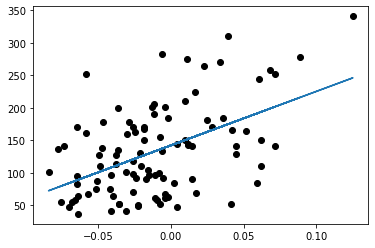

In [6]:
plt.scatter(x_array, y_array,c='black')
plt.plot(x_array, result1[0]+result1[1]*x_array)
plt.savefig("oui.png")

In [7]:
#Compar 
print("Ordinary least squares method : ", result1)
print("Spicy library : ", result2)
print("Sklearn library : ", result3)


Ordinary least squares method :  [142.32732717717232, 831.7673735055242]
Spicy library :  [142.32732717717232, 831.7673735055243]
Sklearn library :  [array([142.32732718]), array([[831.76737351]])]
